# Analyzing Frequency of Chinese Cybersecurity Standards & Indicated Regulatory Enforcement/Legislation modes
------------

- This notebook will go over the cybersecurity related standards released by the TC260 (the Chinese standard setting body) and analyze the historical consultation/publication frequency to uncover trends in the regulators' enforcement modes.
- This notebook also tries to look at cybersecurity and internet companies' influence/relationship with the regulators and SROs to determin the degree of regulatory capture and companies' varying degrees of influence on the regulator.

In [ ]:
# -*- coding: utf-8 -*-
# Copyright (c) 2021, Paul Peng

import requests
import pandas as pd
import os,re
#from google.colab import drive
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta, date

__author__ = 'Paul J. Peng Copyright 2021'

## 1. Collect data from TC260 (the standard setting body)

In [ ]:
url='https://www.tc260.org.cn/front/bzzqyjList.html?postType=&start=1&length=1000'
res=requests.get(url)
soup=bs(res.text,"lxml")
df=pd.DataFrame(columns=['time','name'])
i=0
for item in soup.find_all("li"):
    if item.span:
        i+=1
        _=str(item.span.text)
        start,end=re.search("\d\d\d\d-\d\d-\d\d",_).span()
        df.loc[i,'name']=re.sub('[\r\t\n]','',item.text)
        df.loc[i,'time']=_[start:end]
df['month']=[datetime.strptime(t,"%Y-%m-%d").month for t in df.time]
df['year']=[datetime.strptime(t,"%Y-%m-%d").year for t in df.time]
df.head(5)

,time,name,month,year
1,2021-10-09,关于国家标准《信息安全技术 公钥基础设施 PKI系统安全测评方...,10,2021
2,2021-10-02,关于国家标准《信息安全技术 机器学习算法安全评估规范》征求意见...,10,2021
3,2021-09-30,关于国家标准《信息安全技术 区块链技术安全框架》征求意见稿征求...,9,2021
4,2021-09-21,关于国家标准《信息安全技术 信息系统安全保障评估框架 第1部分...,9,2021
5,2021-08-02,关于国家标准《信息安全技术 网络安全态势感知通用技术要求》征求...,8,2021


## 2. Summary data to check frequency by month

In [ ]:
data=df.pivot_table(index='year',columns='month',aggfunc='count').name
data['sum']=data.sum(axis='columns')
data.fillna('')

month,1,2,3,4,5,6,7,8,9,10,11,12,sum
year,,,,,,,,,,,,,
2010,,3,,,,,1,,,1,,,5.0
2011,,,,,3,,,4,,1,,,8.0
2012,,,,,,,,,3,13,,,16.0
2013,,,,,,,13,,,11,,17,41.0
2014,,,,,12,,,,11,,,,23.0
2015,,,12,,,,,,,,,,12.0
2016,,,,9,,,,4,22,,,26,61.0
2017,,28,,,,,21,19,,16,,,84.0
2018,,,13,,,,24,,,,,,37.0


## 3. Visualize Data

### 3.1 Line Chart

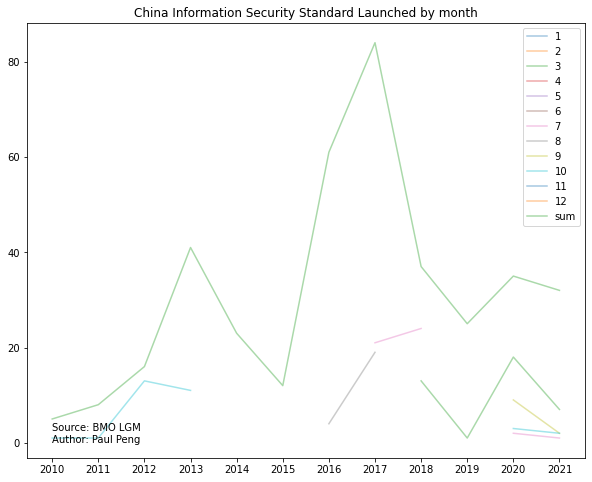

In [ ]:
# Linechart
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,8))

for year,row in data.iteritems():
    ax=plt.plot([str(i) for i in row.index],row.values,alpha=0.4)
plt.title("China Information Security Standard Launched by month")
plt.legend(data.columns)
plt.text(0,0,'Source: BMO LGM \nAuthor: Paul Peng')
plt.show()

### 3.2 Heatmap

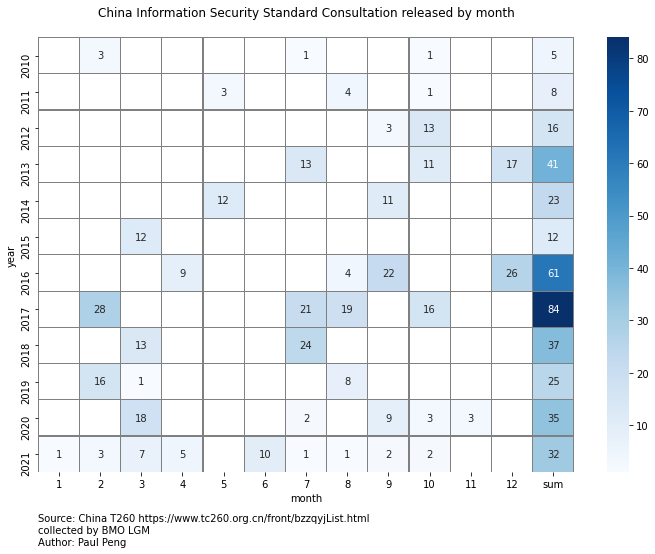

In [ ]:
# Heatmap
import seaborn as sns
fig,ax=plt.subplots(1,1,figsize=(12,8))
ax=sns.heatmap(data,cmap='Blues',linecolor="gray",linewidth=0.2,annot=True)
plt.title("China Information Security Standard Consultation released by month\n")
plt.text(0,14,"Source: China T260 https://www.tc260.org.cn/front/bzzqyjList.html \ncollected by BMO LGM \nAuthor: Paul Peng")
plt.show()

### 3.3 Heatmap mentioning PIP (personal information protection) laws

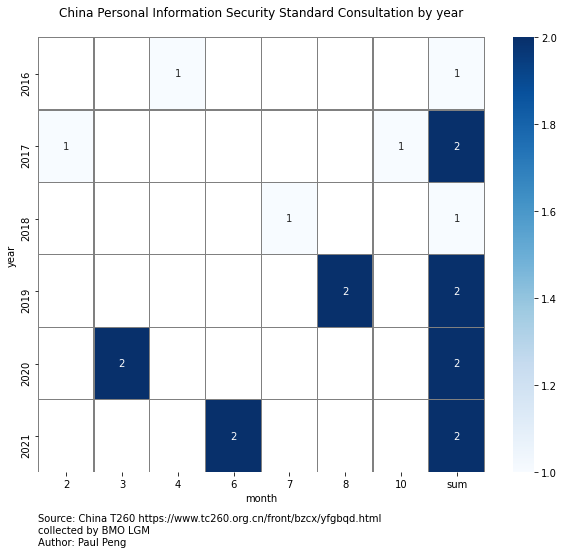

In [ ]:
# Consultations mentioning PIP
fig,ax=plt.subplots(1,1,figsize=(10,8))
summary=df[df['name'].str.contains('个人信息')].pivot_table(index='year',columns='month',aggfunc='count').name
summary['sum']=summary.sum(axis='columns')
ax=sns.heatmap(data=summary,cmap='Blues',linecolor="gray",linewidth=0.2,annot=True)
plt.title("China Personal Information Security Standard Consultation by year\n")
plt.text(0,7,"Source: China T260 https://www.tc260.org.cn/front/bzcx/yfgbqd.html \ncollected by BMO LGM \nAuthor: Paul Peng")
plt.show()

## 4. Collecting released standards data from TC260

In [ ]:
standards_url='https://www.tc260.org.cn/front/bzcx/yfgbqd.html'
published_std=pd.read_html(standards_url)[0]
published_std['Year']=[no[-4:] for no in published_std['标准号']]
published_std.head(5)

,序号,标准号,中文名称,工作组,Year
0,1.0,GB/T 17901.1—2020,信息技术 安全技术 密钥管理 第1部分：框架,WG3,2020
1,2.0,GB/T 17901.3—2021,信息技术 安全技术 密钥管理 第3部分：采用非对称技术的机制,WG3,2021
2,3.0,GB/T 17964—2008,信息安全技术 分组密码算法的工作模式,WG3,2008
3,4.0,GB/T 18238.1—2000,信息技术 安全技术 散列函数 第1部分:概述,WG3,2000
4,5.0,GB/T 18238.2—2002,信息技术 安全技术 散列函数 第2部分:采用n位块密码的散列函数,WG3,2002
...,...,...,...,...,...
318,319.0,GB/T 39335—2020,信息安全技术 个人信息安全影响评估指南,SWG—BDS,2020
319,320.0,GB/T 39477—2020,信息安全技术 政务信息共享 数据安全技术要求,SWG—BDS,2020
320,321.0,GB/T 39725—2020,信息安全技术 健康医疗数据安全指南,SWG—BDS,2020
321,322.0,GB/Z 28828—2012,信息安全技术 公共及商用服务信息系统个人信息保护指南,SWG—BDS,2012


## 5. Visualization

### 5.1 Heatmap of frequencies

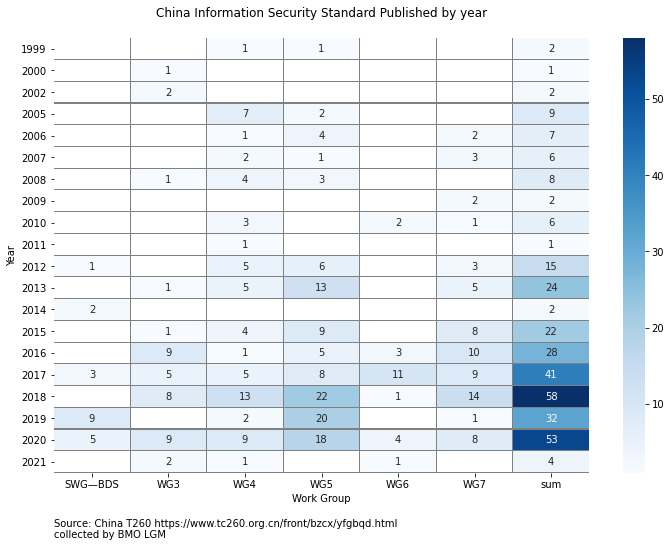

In [ ]:
#visualize information security standards
fig,ax=plt.subplots(1,1,figsize=(12,8))
summary=published_std.pivot_table(index='工作组',columns='Year',aggfunc='count')['中文名称'].T
summary['sum']=summary.sum(axis='columns')
ax=sns.heatmap(data=summary,cmap='Blues',linecolor="gray",linewidth=0.2,annot=True)
ax.set(xlabel='Work Group')
plt.text(0,23,"Source: China T260 https://www.tc260.org.cn/front/bzcx/yfgbqd.html \ncollected by BMO LGM")
plt.show()


### 5.2 Heatmap - mentioning PIP

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 32452 missing from current font.
  font.set_text

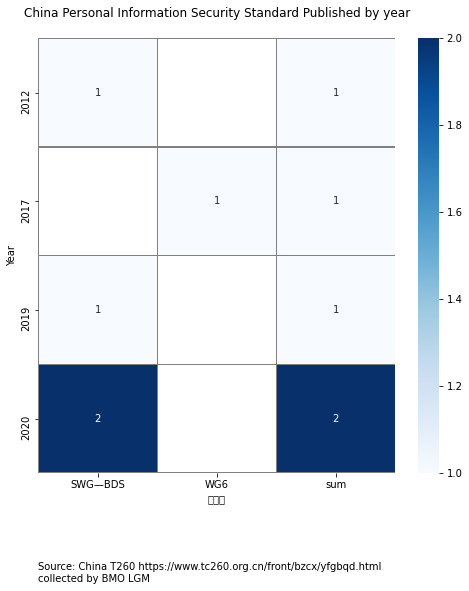

In [ ]:
#specifically mentioning PIP 个人信息
fig,ax=plt.subplots(1,1,figsize=(8,8))
summary=published_std[published_std['中文名称'].str.contains('个人信息')].pivot_table(index='工作组',columns='Year',aggfunc='count')['中文名称'].T
summary['sum']=summary.sum(axis='columns')
ax=sns.heatmap(data=summary,cmap='Blues',linecolor="gray",linewidth=0.2,annot=True)
plt.title("China Personal Information Security Standard Published by year\n")
plt.text(0,5,"Source: China T260 https://www.tc260.org.cn/front/bzcx/yfgbqd.html \ncollected by BMO LGM")
plt.show()

## 6. Check companies/institutions' participation to determine influence/strength with government relations

In [ ]:
participating_int=pd.read_html(requests.get('https://www.tc260.org.cn/front/bzcx/zhcx.html',params={'length':"1000"}).text)[0]
participating_int['承担单位']=[str(row).split('、') for row in participating_int['承担单位']]
participating_int['主要研制人']=[str(row).split('、') for row in participating_int['主要研制人']]
by_int=participating_int.explode('承担单位')#.groupby('承担单位').count().sort_values('项目名称（中文）',ascending=False)
#by_int_by_pers=participating_int.explode('承担单位').explode('主要研制人')#.groupby('承担单位').count().sort_values('项目名称（中文）',ascending=False)

In [ ]:
res=by_int[by_int['项目名称（中文）'].str.contains('互联网')|
       by_int['项目名称（中文）'].str.contains('平台',re.IGNORECASE)|
       by_int['项目名称（中文）'].str.contains('app')|
       by_int['项目名称（中文）'].str.contains('个人信息')].groupby('承担单位').count().sort_values('项目名称（中文）',ascending=False).head(20)
res[res.index.str.contains('公司')]

### 6.1 Mentioning PIP

In [ ]:
participating_int[participating_int['项目名称（中文）'].str.contains('个人信息')]

,项目名称（中文）,项目类型,主要研制人,承担单位
11,信息安全技术 个人信息安全影响评估指南,制定,"[洪延青, 何延哲, 胡影, 高强裔, 陈湉, 赵冉冉, 刘贤刚, 皮山杉, 黄劲, 葛梦莹...","[中国电子技术标准化研究院, 四川大学, 颐信科技有限公司, 深圳市腾讯计算机系统有限公司,..."
54,信息安全技术 个人信息安全规范,修订,"[洪延青, 何延哲, 杨建军, 钱秀槟, 陈兴蜀, 刘贤刚, 上官晓丽, 高林, 邵正强, ...","[中国电子技术标准化研究院, 北京信息安全测评中心, 颐信科技有限公司, 四川大 学, 清华..."
68,信息技术 安全技术 公有云中个人信息保护实践指南,制定,[王庆升],[中国网络安全审查技术与认证中心等]
74,信息安全技术 移动互联网应用程序（App）收集个人信息基本要求,制定,[刘贤刚],[北京信息安全测评中心等]
102,信息安全技术 个人信息去标识化指南,制定,"[金涛, 谢安明, 陈星, 白晓媛, 郑新华, 刘贤刚, 陈文捷, 刘玉岭, 宋鹏举, 赵亮...","[清华大学, 启明星辰信息技术集团股份有限公司, 浙江蚂蚁小微金融服务集团有 限公司, 阿里..."
108,信息安全技术 个人信息安全规范,修订,[杨建军],"[北京信息安全测评中心, 颐信科技有限公司, 四川大学网络空间安全研究院]"
196,信息安全技术 移动智能终端个人信息保护技术要求,制定,"[高洁原, 高炽扬, 罗锋盈, 高子鹏, 王坤, 张华熊, 刘法旺, 刘陶, 杨建军, 郭颖]","[浙江长天信息技术有限公司, 浙江省经济和信息化委员会, 成都网安科技发展有限公司, 中国软..."
383,信息安全技术 公共及商用服务信息系统个人信息保护指南,制定,[高炽扬 李守鹏 朱璇 杨建军 罗锋盈 何伟起 郭涛 彭勇 严晓凤 刘陶 朱信铭 王芳 郭臣...,"[中国软件评测中心, 北京赛迪信息技术评测有限公司, 中国信息安全测评中心, 中国电子技术标..."
673,信息安全技术 个人信息去标识化效果分级评估规范,制定,[金涛],[清华大学]
707,信息安全技术 个人信息安全工程指南,制定,[刘贤刚],[nan]


### 6.2 Top companies by participation

In [ ]:
res=by_int.groupby('承担单位').count().sort_values('项目名称（中文）',ascending=False)
res[res.index.str.contains('公司')].head(30)

,项目名称（中文）,项目类型,主要研制人
承担单位,,,
华为技术有限公司,41,41,41
北京数字认证股份有限公司,36,36,36
中国信息安全研究院有限公司,27,27,27
北京天融信网络安全技术有限公司,24,24,24
上海三零卫士信息安全有限公司,23,23,23
阿里云计算有限公司,23,23,23
中电长城网际系统应用有限公司,22,22,22
北京江南天安科技有限公司,20,20,20
启明星辰信息技术集团股份有限公司,19,19,19
